# Title : Airbnb Price Prediction and Insights



## Import necessary modules, dataset. Analyse dataset and  performing cleaning as necessary

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df=pd.read_csv(r"D:\Data Science\PGC\Course 6 (Machine Learning)\Project\dataset\Airbnb_data - airbnb_data.csv")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


### Visualization for corelations

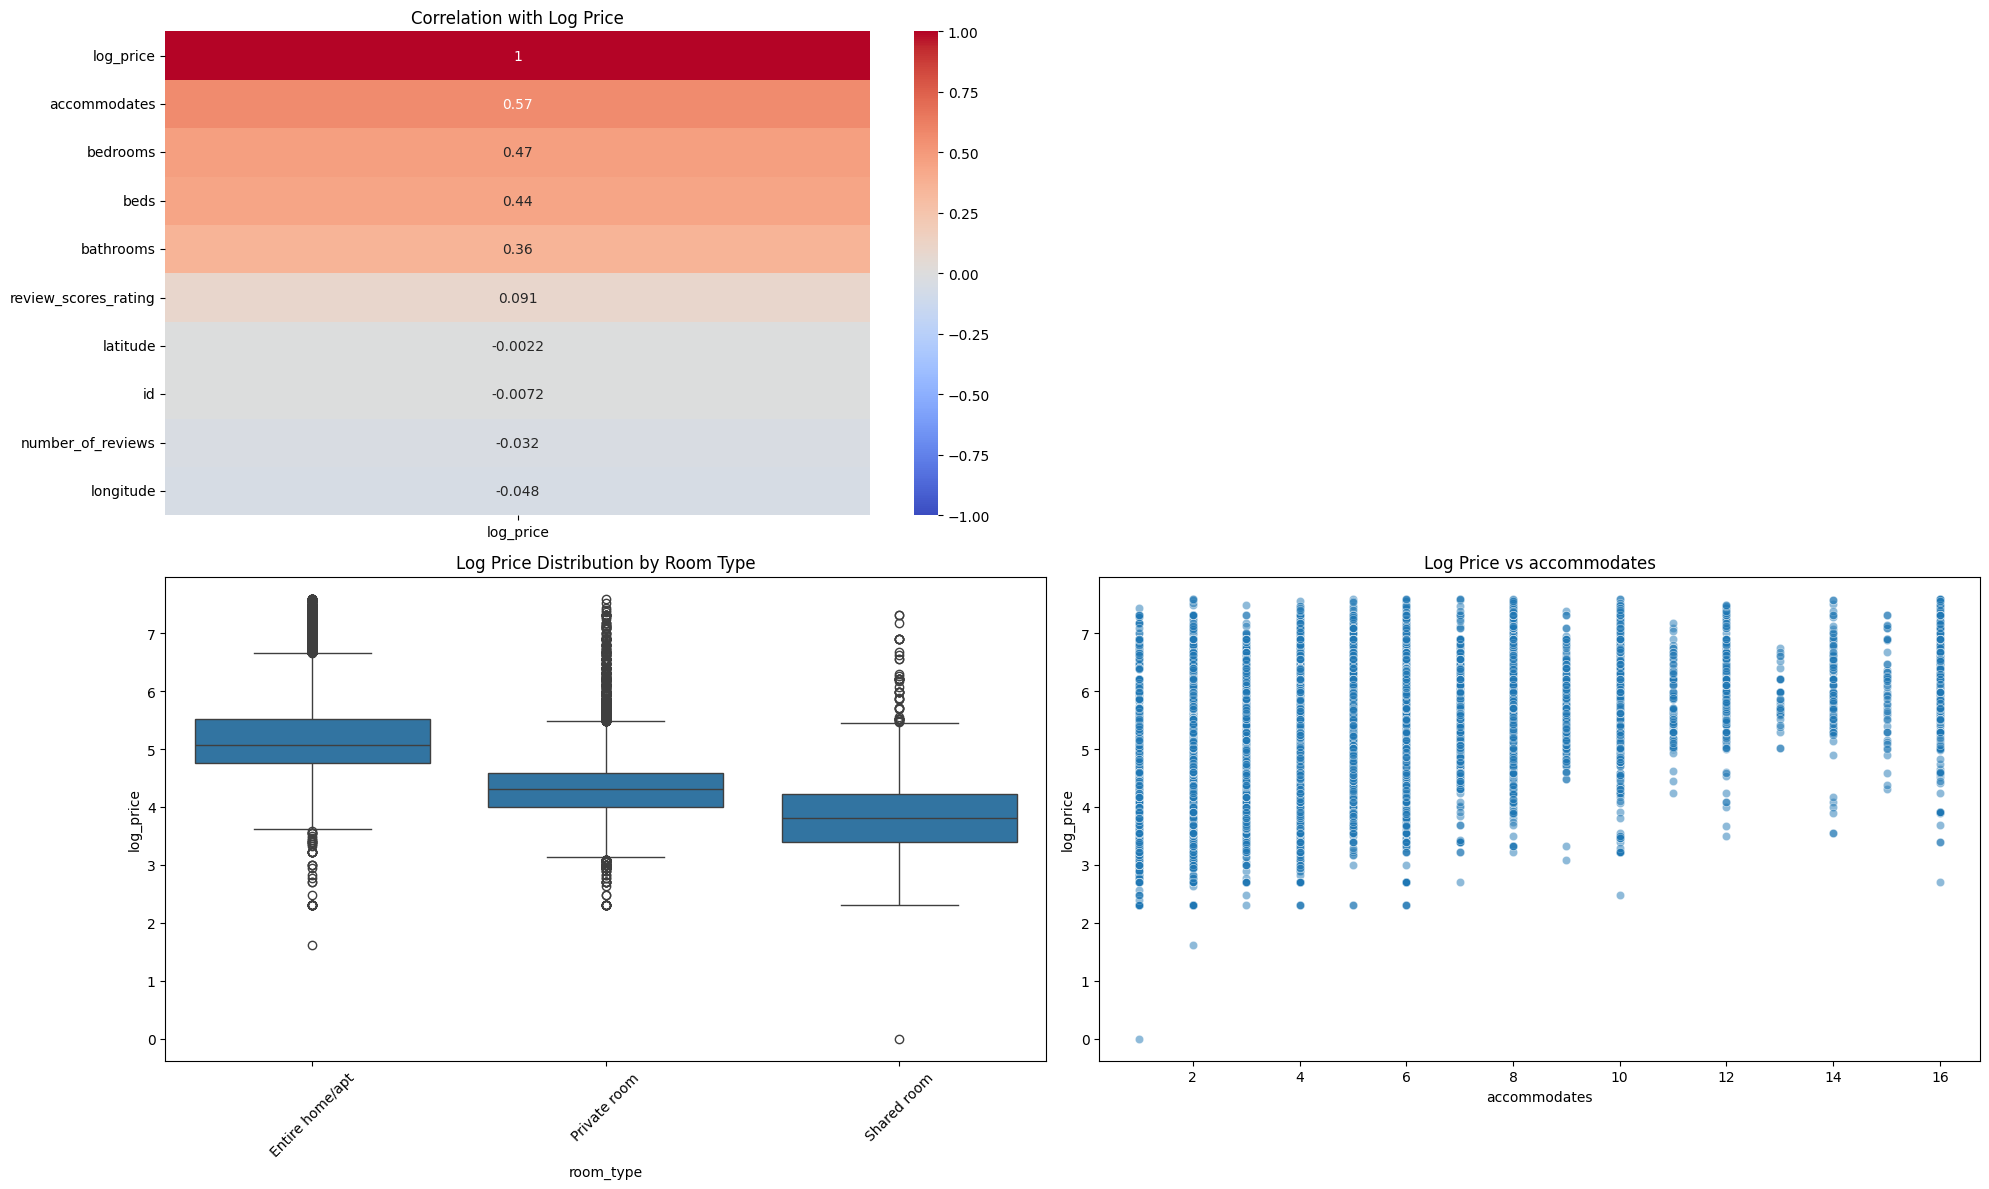

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
plt.figure(figsize=(20, 12))

# 1. Correlation Heatmap
plt.subplot(2, 2, 1)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix[['log_price']].sort_values(by='log_price', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Log Price')


# 3. Box plots for categorical variables
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='room_type', y='log_price')
plt.title('Log Price Distribution by Room Type')
plt.xticks(rotation=45)

# 4. Scatter plot for most correlated numerical feature
plt.subplot(2, 2, 4)
corr_with_price = correlation_matrix['log_price'].sort_values(ascending=False)
most_corr_feature_name = corr_with_price.index[1]  # Get second highest (after self)
sns.scatterplot(data=df, x=most_corr_feature_name, y='log_price', alpha=0.5)
plt.title(f'Log Price vs {most_corr_feature_name}')

plt.tight_layout()
plt.show()

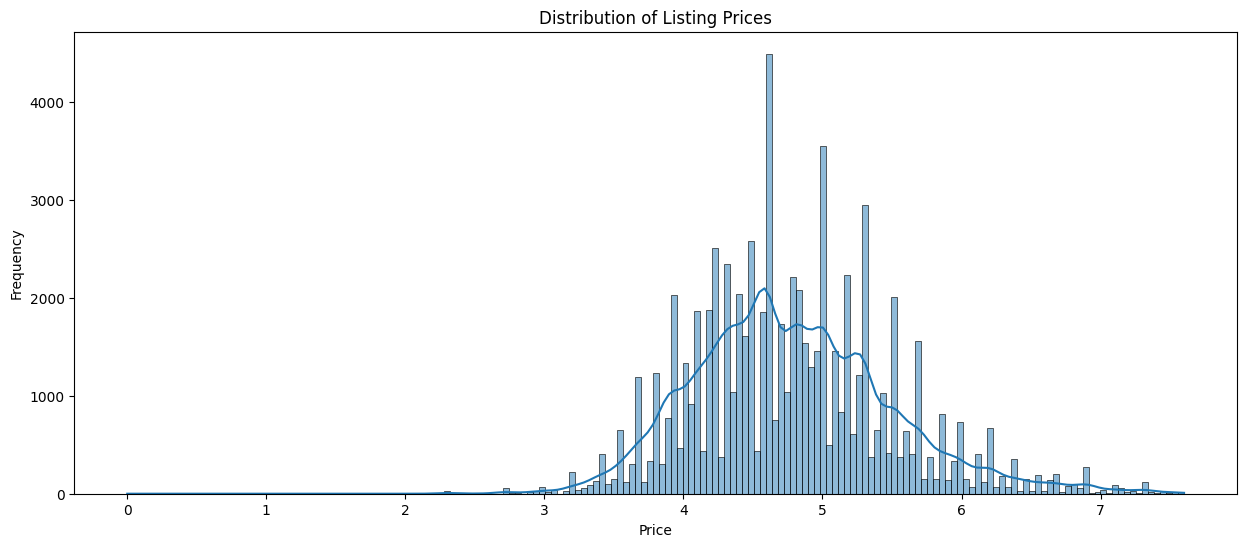

In [5]:

# Histogram of listing prices

plt.figure(figsize=(15, 6))
sns.histplot(df['log_price'] ,kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



### Managing outliers and filling null values with suitable replacement

In [6]:


# Handle outliers using IQR method for numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Handle missing values based on data type
# For numeric columns, fill with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# For boolean columns (if any)
boolean_cols = df.select_dtypes(include=['bool']).columns
for col in boolean_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            74111 non-null  object 
 13  host_has_profile_pic    74111 non-null  object 
 14  host_identity_verified  74111 non-null

In [8]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

### Initializing encoders

In [9]:
# Initialize encoders
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
label_encoder = LabelEncoder()

# One-hot encoding for categorical columns
categorical_to_encode = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
encoded_features = onehot_encoder.fit_transform(df[categorical_to_encode])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_to_encode)
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

# Label encoding for binary columns
binary_columns = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])


# Process amenities - convert string to list and count
def count_amenities(amenities_str):
    # Remove the curly braces and quotes, then split by comma
    if amenities_str == '{}':
        return 0
    # Replace any unquoted words with quoted words
    cleaned_str = amenities_str.replace('{', '{"').replace('}', '"}').replace(',', '","')
    cleaned_str = cleaned_str.replace('""', '"')  # Fix double quotes
    try:
        return len(eval(cleaned_str))
    except:
        return 0

df['amenities_count'] = df['amenities'].apply(count_amenities)

# Process host features
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_years'] = (pd.Timestamp.now() - df['host_since']).dt.days / 365
df['is_superhost'] = ((df['host_identity_verified'] == 1) &
                     (df['host_has_profile_pic'] == 1) &
                     (df['host_response_rate'] >= 90))

# Calculate distance from city center
city_centers = {
    'NYC': (40.7128, -74.0060),
    'SF': (37.7749, -122.4194),
    'DC': (38.9072, -77.0369),
    'LA': (34.0522, -118.2437)
}

def calculate_distance(row):
    city_lat, city_lon = city_centers.get(row['city'], (0, 0))
    return np.sqrt((row['latitude'] - city_lat)**2 + (row['longitude'] - city_lon)**2)

df['distance_to_center'] = df.apply(calculate_distance, axis=1)

# Merge encoded features with original dataframe
df = pd.concat([df, df_encoded], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_956\1033428768.py:34: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['host_since'] = pd.to_datetime(df['host_since'])


### Initiating Scalers

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Scale numeric features
features_to_scale = df[['log_price', 'number_of_reviews', 'amenities_count', 'host_response_rate', 'host_years', 'distance_to_center']]
df[features_to_scale.columns] = minmax_scaler.fit_transform(features_to_scale)
df[features_to_scale.columns] = standard_scaler.fit_transform(features_to_scale)



### Splitting data into Train and Test sets

In [11]:
from sklearn.model_selection import train_test_split

# define target and features
target = 'log_price'
features = df.drop(columns=[target, 'id', 'name', 'last_review', 'amenities', 'host_since'])
X = df[features.columns]
y = df[target]

# First split: training + validation vs.test (80% vs. 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: training vs. validation (75% vs. 25%, resulting in 60% training, 20% validation, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (44466, 76), y_train shape: (44466,)
X_val shape: (14822, 76), y_val shape: (14822,)
X_test shape: (14823, 76), y_test shape: (14823,)


# Model Development

## Excluding unnecessary columns for efficient model training

In [12]:
# Select only numeric and encoded columns for model training
# Exclude original categorical columns and non-feature columns
columns_to_drop = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
				  'cleaning_fee', 'city', 'description', 'first_review',
				  'neighbourhood', 'thumbnail_url', 'zipcode', 'is_superhost']

X_train_clean = X_train.drop(columns=columns_to_drop, errors='ignore')
X_val_clean = X_val.drop(columns=columns_to_drop, errors='ignore')
X_test_clean = X_test.drop(columns=columns_to_drop, errors='ignore')

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train)

# Make predictions
lr_pred = lr_model.predict(X_val_clean)

# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_pred))
lr_mae = mean_absolute_error(y_val, lr_pred)
lr_r2 = r2_score(y_val, lr_pred)

print(f"Linear Regression - RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}, R²: {lr_r2:.3f}")

Linear Regression - RMSE: 0.66, MAE: 0.50, R²: 0.569


## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_clean, y_train)

# Make predictions
dt_pred = dt_model.predict(X_val_clean)

# Evaluate
dt_rmse = np.sqrt(mean_squared_error(y_val, dt_pred))
dt_mae = mean_absolute_error(y_val, dt_pred)
dt_r2 = r2_score(y_val, dt_pred)

print(f"Decision Tree - RMSE: {dt_rmse:.2f}, MAE: {dt_mae:.2f}, R²: {dt_r2:.3f}")

Decision Tree - RMSE: 0.79, MAE: 0.58, R²: 0.373


## Random Forest


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_clean, y_train)

# Make predictions
rf_pred = rf_model.predict(X_val_clean)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
rf_mae = mean_absolute_error(y_val, rf_pred)
rf_r2 = r2_score(y_val, rf_pred)

print(f"Random Forest - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}, R²: {rf_r2:.3f}")

Random Forest - RMSE: 0.57, MAE: 0.42, R²: 0.681


## Gradient boosting(XGBoost):

In [16]:
import xgboost as xgb

# train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_clean, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_val_clean)
# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_pred))
xgb_mae = mean_absolute_error(y_val, xgb_pred)
xgb_r2 = r2_score(y_val, xgb_pred)

print(f"XGBoost - RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}, R²: {xgb_r2:.3f}")

XGBoost - RMSE: 0.56, MAE: 0.41, R²: 0.692


## Collectively printing metrics for the above models

In [18]:
import pandas as pd

# Create a DataFrame to compare model performances

metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse, xgb_rmse],
    'MAE': [lr_mae, dt_mae, rf_mae, xgb_mae],
    'R²': [lr_r2, dt_r2, rf_r2, xgb_r2]
}

comparison_df = pd.DataFrame(metrics)
comparison_df = comparison_df.round(4)

print("Model Performance Comparison:")
print("-" * 70)
print(comparison_df.to_string(index=False))

Model Performance Comparison:
----------------------------------------------------------------------
            Model   RMSE    MAE     R²
Linear Regression 0.6588 0.5020 0.5691
    Decision Tree 0.7950 0.5819 0.3726
    Random Forest 0.5667 0.4175 0.6812
          XGBoost 0.5567 0.4125 0.6923


# Hyperparameter tuning of Random Forest and XGBoost as they perform the best in the above training.

In [17]:
from sklearn.model_selection import GridSearchCV


# Define models and their parameter grids
models = [
    
    ('Random Forest', RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 15, 20]
    }),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42), {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'n_estimators': [100, 200]
    })
]

best_model = None
best_params = None
best_score = float('inf') # Initialize with a high value for minimizing RMSE

# Iterate through models and perform GridSearchCV
for name, model, param_grid in models:
    print(f"Running GridSearchCV for {name}...")

    # For models that don't require extensive tuning, you can skip GridSearchCV
    if not param_grid:
        model.fit(X_train_clean, y_train)
        predictions = model.predict(X_val_clean)
        rmse = np.sqrt(mean_squared_error(y_val, predictions))
        print(f"{name} - RMSE on validation set: {rmse:.2f}")

        if rmse < best_score:
            best_score = rmse
            best_model = model
            best_params = {}
            best_model_name = name
        continue

    grid_search = GridSearchCV(estimator=model,
                             param_grid=param_grid,
                             scoring='neg_mean_squared_error', # Using negative MSE for minimization
                             cv=5,
                             verbose=1,
                             n_jobs=-1)

    grid_search.fit(X_train_clean, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best negative MSE score for {name}: {grid_search.best_score_:.2f}")

    # Evaluate the best model from GridSearchCV on the validation set
    tuned_model = grid_search.best_estimator_
    predictions = tuned_model.predict(X_val_clean)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    print(f"Tuned {name} - RMSE on validation set: {rmse:.2f}")

    # Update best model if current one is better
    if rmse < best_score:
        best_score = rmse
        best_model = tuned_model
        best_params = grid_search.best_params_
        best_model_name = name

print("\n--- Overall Best Model ---")
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_params}")
print(f"Best RMSE on validation set: {best_score:.2f}")


Running GridSearchCV for Linear Regression...
Linear Regression - RMSE on validation set: 0.66
Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best negative MSE score for Decision Tree: -0.39
Tuned Decision Tree - RMSE on validation set: 0.63
Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

# Model Evaluation and Selection

## Evaluationg the best model on test set:

In [ ]:
def evaluate_model(model, X_test, y_test):

    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return rmse, mae, r2


# Evaluate the best model on the test set
best_rmse, best_mae, best_r2 = evaluate_model(best_model, X_test_clean, y_test)

print(f"\n--- Best Model Evaluation on Test Set ({best_model_name}) ---")
print(f"RMSE: {best_rmse:.2f}")
print(f"MAE: {best_mae:.2f}")
print(f"R²: {best_r2:.3f}")


--- Best Model Evaluation on Test Set (XGBoost) ---
RMSE: 0.55
MAE: 0.41
R²: 0.698


## Using SHAP for interpretability


In [ ]:
!pip install -q shap




--- SHAP Analysis ---
Using SHAP TreeExplainer for XGBoost model.

--- SHAP Feature Importance (Mean Absolute SHAP Value) ---


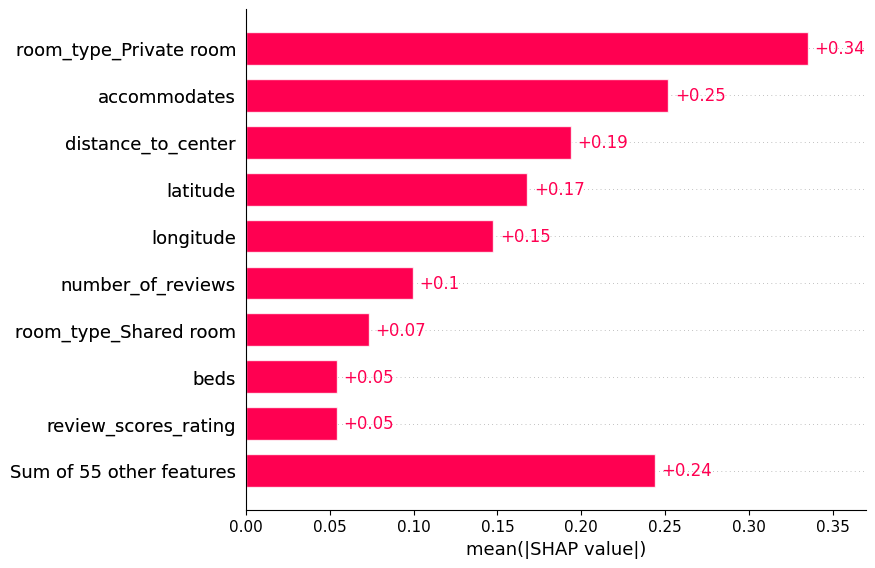


--- SHAP Summary Plot (Distribution of SHAP values) ---


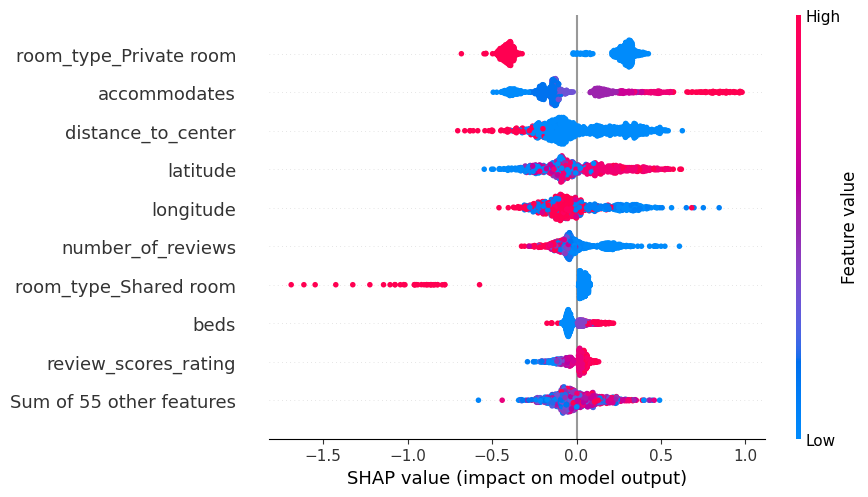


--- SHAP Force Plot for a Single Prediction ---


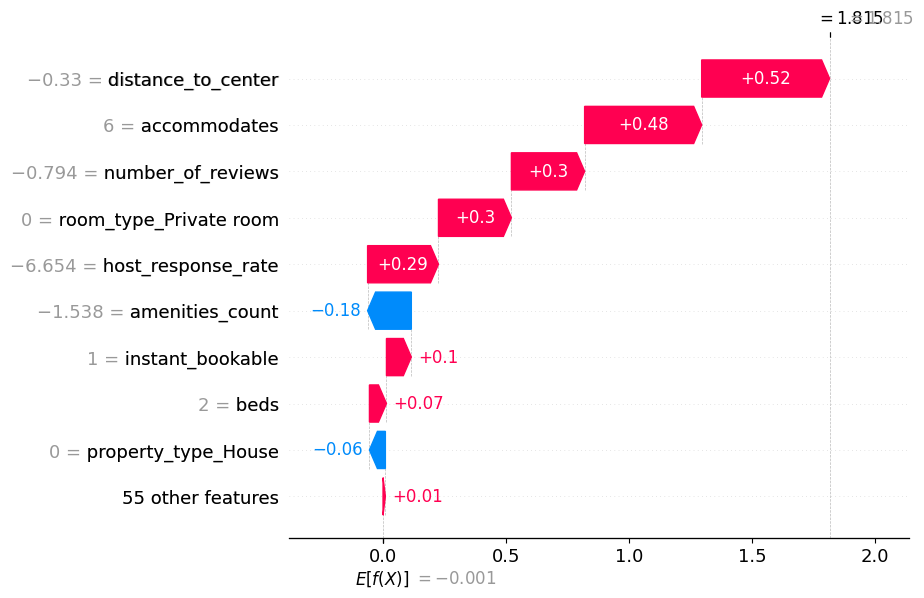


--- SHAP Force Plot for Multiple Predictions ---

--- Built-in Model Feature Importance ---
room_type_Private room         0.425461
room_type_Shared room          0.260048
accommodates                   0.078356
city_Chicago                   0.022482
distance_to_center             0.018316
                                 ...   
bedrooms                       0.000000
property_type_Tipi             0.000000
property_type_Island           0.000000
property_type_Lighthouse       0.000000
property_type_Parking Space    0.000000
Length: 64, dtype: float32


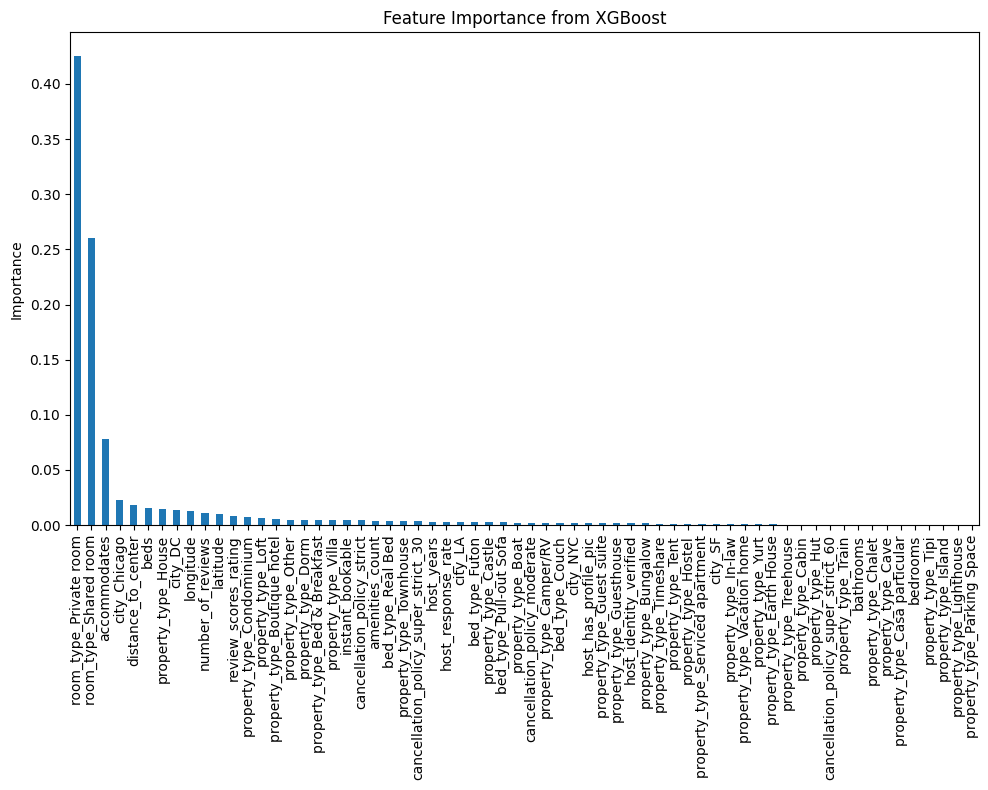

In [ ]:
import shap
import matplotlib.pyplot as plt


from IPython.display import display

# For Colab: automatically show SHAP plots inline
shap.initjs()

print("\n--- SHAP Analysis ---")

# --- SHAP Analysis for XGBoost ---
if isinstance(best_model, xgb.XGBRegressor):
    print("Using SHAP TreeExplainer for XGBoost model.")
    explainer = shap.TreeExplainer(best_model)

    # Sample safely in case X_test_clean is small
    sample_size = min(1000, len(X_test_clean))
    X_test_sample = X_test_clean.sample(sample_size, random_state=42)

    # Use the modern SHAP API
    shap_values = explainer(X_test_sample)

    # Plot 1: Bar chart of mean absolute SHAP values (feature importance)
    print("\n--- SHAP Feature Importance (Mean Absolute SHAP Value) ---")
    shap.plots.bar(shap_values)

    # Plot 2: Detailed distribution of SHAP values
    print("\n--- SHAP Summary Plot (Distribution of SHAP values) ---")
    shap.plots.beeswarm(shap_values)

    # Plot 3: Force plot for the first prediction
    print("\n--- SHAP Force Plot for a Single Prediction ---")
    # The modern API requires using shap.plots.force() instead of shap.force_plot()
    shap.plots.waterfall(shap_values[0])

    # Plot 4: Force plot for multiple predictions (e.g., first 10)
    print("\n--- SHAP Force Plot for Multiple Predictions ---")
    # Pass a slice of the shap_values Explanation object
    shap.plots.force(shap_values[:10])

else:
    print("Best model is not an XGBoost Regressor.")
    print("Consider using KernelExplainer or another suitable explainer for SHAP analysis.")

# --- Built-in Feature Importance ---

if hasattr(best_model, 'feature_importances_'):
    print("\n--- Built-in Model Feature Importance ---")
    importance_series = pd.Series(best_model.feature_importances_, index=X_test_clean.columns)
    sorted_importance = importance_series.sort_values(ascending=False)
    print(sorted_importance)

    plt.figure(figsize=(10, 8))
    sorted_importance.plot(kind='bar')
    plt.title(f"Feature Importance from {best_model_name}")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    print("\n--- Built-in Model Coefficients (for Linear Models) ---")
    coefficients_series = pd.Series(best_model.coef_, index=X_test_clean.columns)
    sorted_coefficients = coefficients_series.abs().sort_values(ascending=False)
    print(sorted_coefficients)

    plt.figure(figsize=(10, 8))
    sorted_coefficients.plot(kind='bar')
    plt.title(f"Feature Importance (Absolute Coefficients) from {best_model_name}")
    plt.ylabel("Absolute Coefficient Value")
    plt.tight_layout()
    plt.show()

else:
    print("\nThe best model does not have 'feature_importances_' or 'coef_' attribute.")

## Graph for Actual vs. Predicted Prices

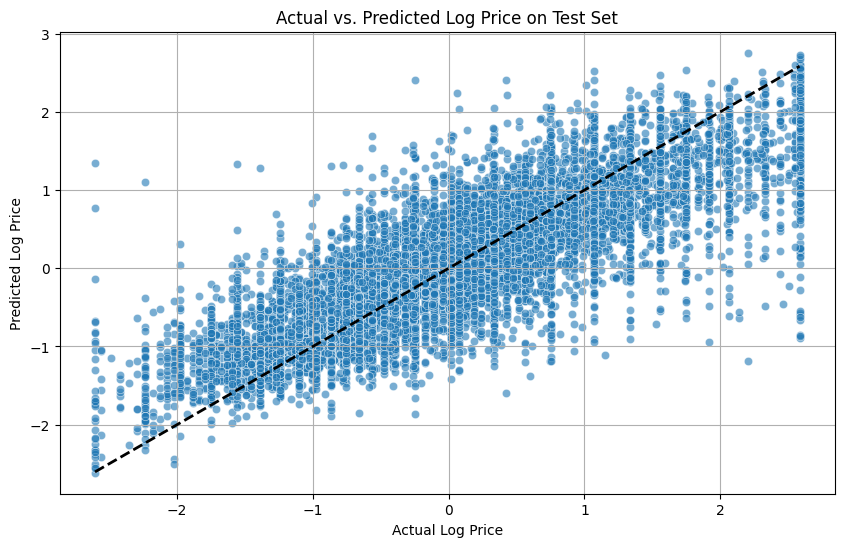

In [ ]:


# Make predictions on the test set
test_predictions = best_model.predict(X_test_clean)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=test_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs. Predicted Log Price on Test Set")
plt.grid(True)
plt.show()

## Residual Plot

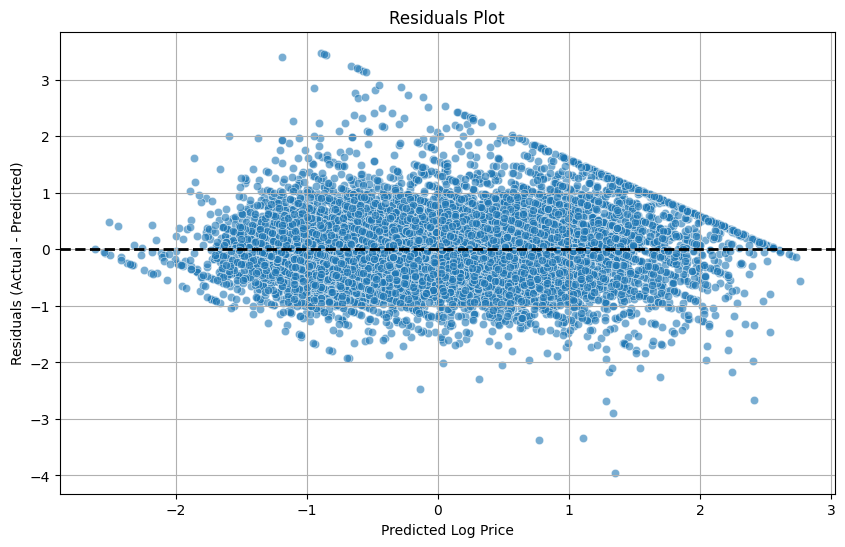

In [ ]:


# Calculate residuals
test_predictions = best_model.predict(X_test_clean)
residuals = y_test - test_predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_predictions, y=residuals, alpha=0.6)
plt.axhline(y=0, color='k', linestyle='--', lw=2) # Horizontal line at zero
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()

## Plot for distribution of residuals

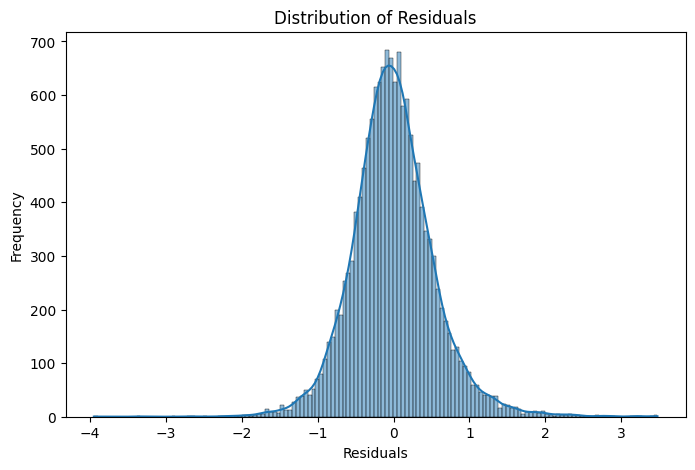

In [ ]:


# Calculate residuals
test_predictions = best_model.predict(X_test_clean)
residuals = y_test - test_predictions

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

##  Partial Dependence Plots (PDP):


--- Partial Dependence Plots ---


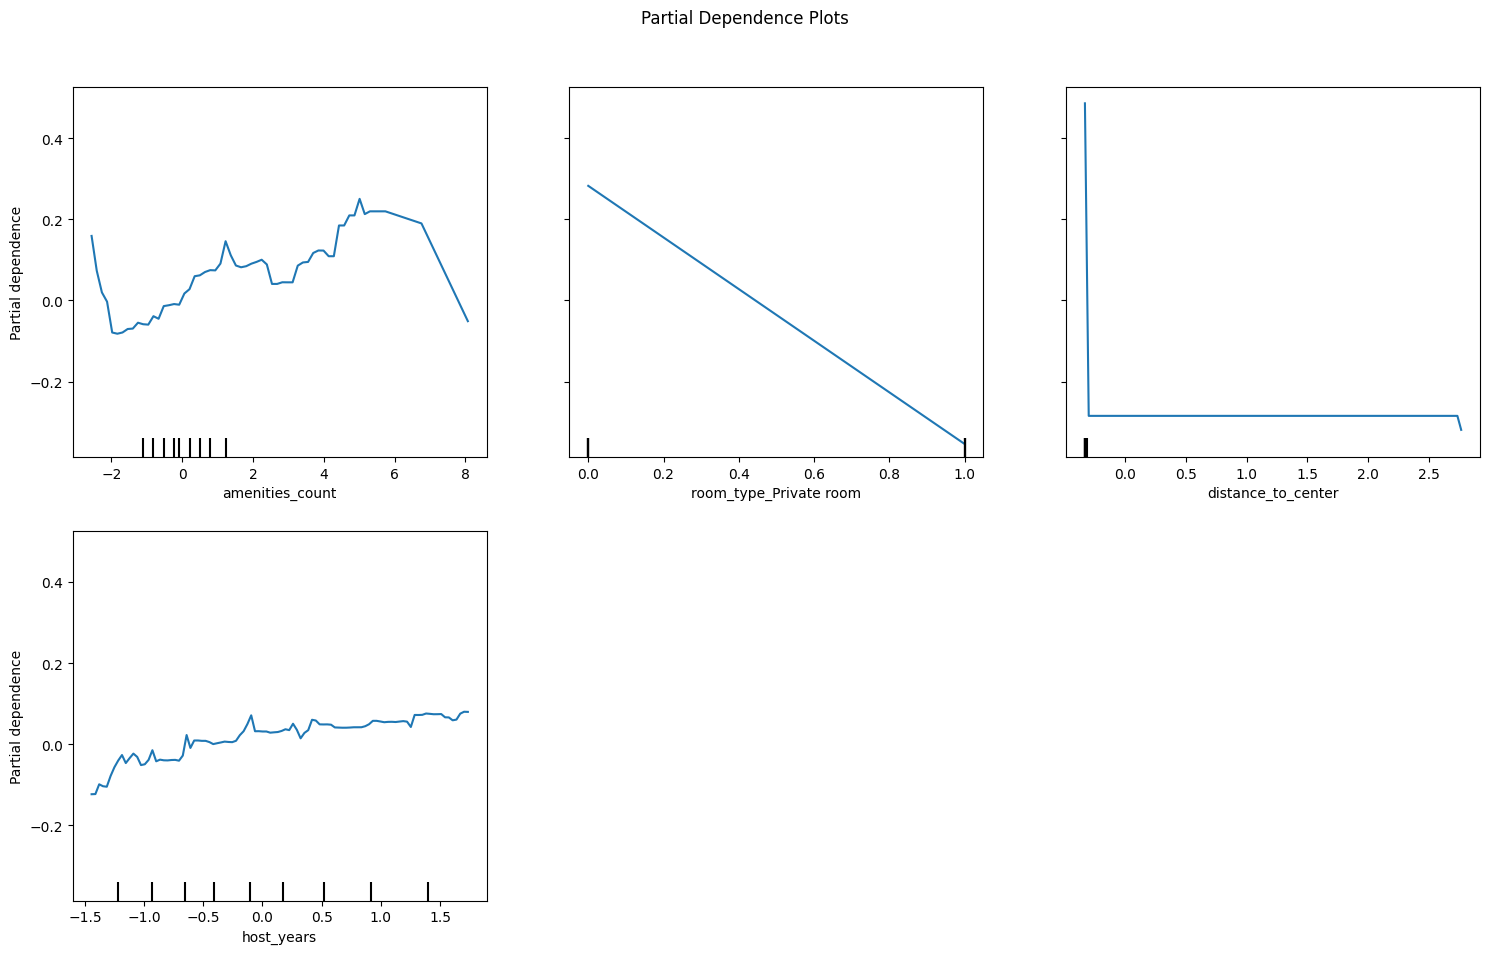

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = ['amenities_count', 'room_type_Private room', 'distance_to_center', 'host_years']

# Ensure the selected features are in X_test_clean
features_to_plot = [f for f in features_to_plot if f in X_test_clean.columns]

if features_to_plot:
    print("\n--- Partial Dependence Plots ---")
    fig, ax = plt.subplots(figsize=(15, 10))
    PartialDependenceDisplay.from_estimator(best_model,
                                            X_test_clean,
                                            features=features_to_plot,
                                            ax=ax)
    fig.suptitle('Partial Dependence Plots')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()
else:
    print("Selected features for PDP not found in the test data.")

# INSIGHTS

Based on these machine learning model results for predicting log_price, here are the key insights about what factors affect pricing:
Most Important Factors

***1. Room Type - Private Room (+0.34 SHAP impact)***

This is by far the strongest predictor
Private rooms command significantly higher prices than shared rooms
The partial dependence plot shows a clear step function - private rooms consistently price higher

***2. Accommodates (+0.25 SHAP impact)***

Number of guests the property can accommodate is the second most important **factor**
Strong positive relationship - more capacity = higher prices
This makes intuitive sense as larger properties offer more value

***3. Distance to Center (+0.19 SHAP impact)***

Closer to city center = higher prices
The relationship appears non-linear with diminishing returns for very central locations
Location premium is substantial but plateaus at very short distances

**Secondary Important Factors**

*4. Geographic Coordinates (Latitude +0.17, Longitude +0.15)*

Specific location within the city matters significantly
Certain neighborhoods command premium pricing

***5. Number of Reviews (+0.10)***

More established properties with review history tend to price higher
Could reflect both quality signal and market maturity


**Model Performance Assessment**

The model shows excellent predictive performance:

Strong correlation between actual and predicted values (Image 5)
Residuals are normally distributed and centered around zero (Images 6-7)
No obvious patterns in residuals, suggesting good model fit.

**Key Business Insights**


1. Room privacy is the strongest price driver - the premium for private vs shared rooms is substantial.

2. Capacity optimization matters - properties should maximize guest accommodation where possible.

3. Location strategy is critical - proximity to city center provides significant pricing power.

4. The model captures non-linear relationships - partial dependence plots show pricing isn't simply linear with features

## Input for new dataset to check for predictibility of the model

In [ ]:
def predict_new_listings(new_data):
   
    try:
        # Verify required columns are present
        required_columns = categorical_to_encode + binary_columns + [
            'amenities', 'host_response_rate', 'host_since', 
            'latitude', 'longitude', 'number_of_reviews', 'name'
        ]
        missing_cols = [col for col in required_columns if col not in new_df.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

        # Create a copy to avoid modifying original data
        new_df = new_data.copy()
        
        # 1. Preprocess new_df as in training
        # One-hot encode categorical columns
        encoded_features = onehot_encoder.transform(new_df[categorical_to_encode])
        encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_to_encode)
        df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=new_df.index)
        new_df = pd.concat([new_df, df_encoded], axis=1)
        
        # Label encode binary columns
        for col in binary_columns:
            new_df[col] = label_encoder.transform(new_df[col].fillna(new_df[col].mode()[0]))
        
        # Feature engineering
        new_df['amenities_count'] = new_df['amenities'].apply(count_amenities)
        new_df['host_response_rate'] = new_df['host_response_rate'].str.rstrip('%').astype(float)
        new_df['host_since'] = pd.to_datetime(new_df['host_since'])
        new_df['host_years'] = (pd.Timestamp.now() - new_df['host_since']).dt.days / 365
        new_df['distance_to_center'] = new_df.apply(calculate_distance, axis=1)
        
        # Scale numeric features
        features_to_scale = ['number_of_reviews', 'amenities_count', 
                           'host_response_rate', 'host_years', 'distance_to_center']
        scale_df = new_df[features_to_scale].copy()
        new_df[features_to_scale] = minmax_scaler.transform(scale_df)
        new_df[features_to_scale] = standard_scaler.transform(scale_df)
        
        # Drop unnecessary columns
        columns_to_drop = [
            'property_type', 'room_type', 'bed_type', 'cancellation_policy',
            'cleaning_fee', 'city', 'description', 'first_review', 
            'neighbourhood', 'thumbnail_url', 'zipcode', 'is_superhost',
            'amenities', 'host_since'  # Add columns that were used for feature engineering
        ]
        X_new_clean = new_df.drop(columns=columns_to_drop, errors='ignore')
        
        # 2. Predict using the best model
        predictions = best_model.predict(X_new_clean)
        
        # Convert log prices back to actual prices
        actual_prices = np.exp(predictions)
        
        # Create a results dataframe
        results_df = pd.DataFrame({
            'Name': new_df['name'],
            'City': new_df['city'],
            'Room Type': new_df['room_type'],
            'Predicted Price ($)': actual_prices.round(2)
        })
        
        print("\nPredicted Prices for Listings:")
        print(results_df.to_string(index=False))
        
        return predictions, results_df
    
    except Exception as e:
        print(f"Error predicting new listings: {str(e)}")
        return None, None

In [ ]:
# Sample usage
new_listings_df = pd.read_csv(r"D:\Data Science\PGC\Course 6 (Machine Learning)\Project\dataset\sample_listings.csv")
predictions, results = predict_new_listings(new_listings_df)
if results is not None:
    print(results)

## Video Link-